**This is a work along tutorial at the beginner level for the Titanic competition. **

**My goals for this notebook:**

* **Part 1: understand the data by EDA and derive simple models by pandas as baseline**
* **Part 2: apply data wrangling and feature engineering**
* **Part 3: implement the basic ML algorithms from scikit-learn**
* **and also some simple NN from keras and tensorflow**
* **apply quantitative diagnostics to compare the results of different models**



**This notebook is based on these turorials, notebooks and courses:**
* 
* **Datacamp: Kaggle Tutorial: EDA & Machine Learning**
* 
* **Udemy: Python for Data Science and Machine Learning Bootcamp**





In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline

sns.set()

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


gender_submission.csv
test.csv
train.csv



In [110]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


df_train has 891 entries, some values for Cabin and Age are missing

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Also in df_test some values for Age and many values for Cabin are missing

In [114]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Comparing distribution of features in df_train and df_test, Pclass and Age seem very similar, distributions for SibSo, Parch and Fare only slightly different

In [115]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Of all passengers in df_train, how many survived, how many died ?** 

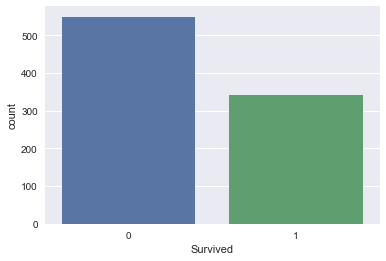

In [116]:
sns.countplot(x='Survived', data=df_train);

In [162]:
print(1.0*df_train.Survived.sum()/df_train.Survived.count())

0.383838383838


more people died than survived (38% survived)

-> base model : no survivors

submission : 0.627 accuracy

In [118]:
#df_test['Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)

In [119]:
#df_test.describe()

**Sex: Female more likely to survive than male**

In [120]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

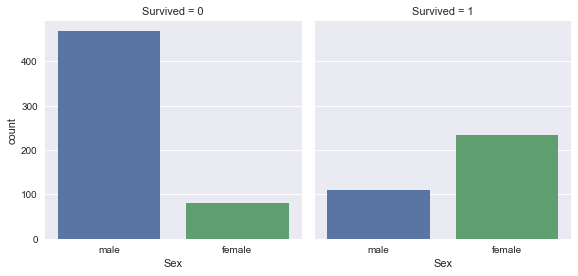

In [121]:
sns.factorplot(x='Sex', col='Survived', kind='count', data=df_train);

In [163]:
print("% of women survived: " , 1.0*df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , 1.0*df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

('% of women survived: ', 0.7420382165605095)
('% of men survived:   ', 0.18890814558058924)


Women were more likely to survive than men 

74 % of women survived
but only 19% of men
(in training set)

second model :
all women survived and all men died
submission : 0.766 accuracy


In [123]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [124]:
df_test[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

**Passenger Class : Survival rate decreases with Pclass**

In [125]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [126]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
('Pclass=1 : ', 0)
('Pclass=2 : ', 0)
('Pclass=3 : ', 0)


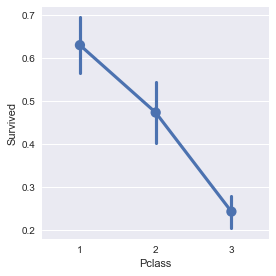

In [127]:
sns.factorplot('Pclass','Survived', data=df_train)
plt.show()

**Passenger Class and Sex :**

**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [128]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

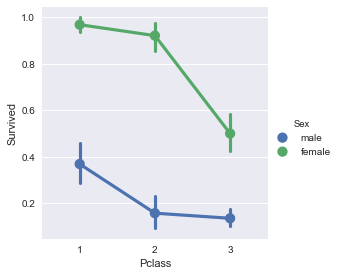

In [129]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

**Embarked : Survival rate lowest for S and highest for C**

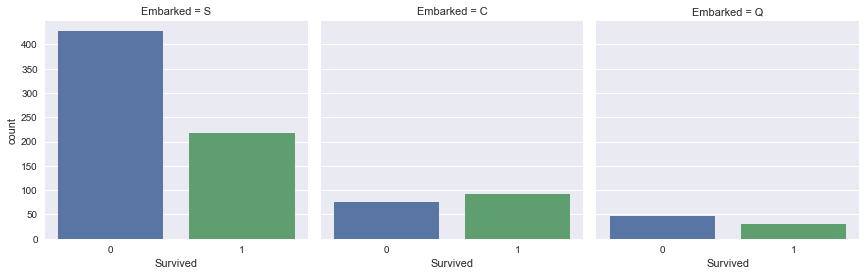

In [130]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

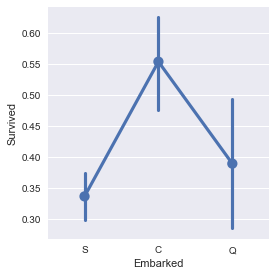

In [131]:
sns.factorplot('Embarked','Survived', data=df_train)
plt.show()

**Embarked and Sex**

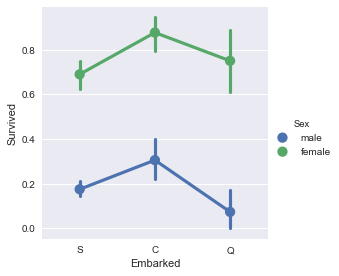

In [132]:
sns.factorplot('Embarked','Survived', hue= 'Sex', data=df_train)
plt.show()

**Embarked, Pclass and Sex :**

** Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived. **

** All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2 **

** For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4 **

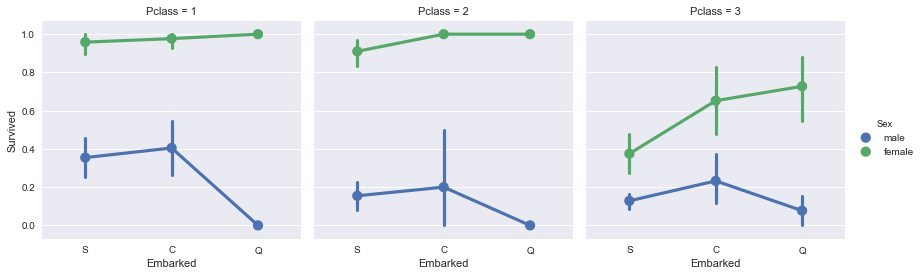

In [133]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'Sex', data=df_train)
plt.show()

In [134]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

third model :
based on PClass, Sex and Embarked ,
submission : 0.779 accuracy

In [135]:
df_test['Survived'] = 0

# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [136]:
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

**Age categorical**

In [137]:
for df in [df_train, df_test]:
    df['Age_ctg']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_ctg'] = i

In [138]:
print(df_train[['Age' , 'Age_ctg']].head(10))

    Age  Age_ctg
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


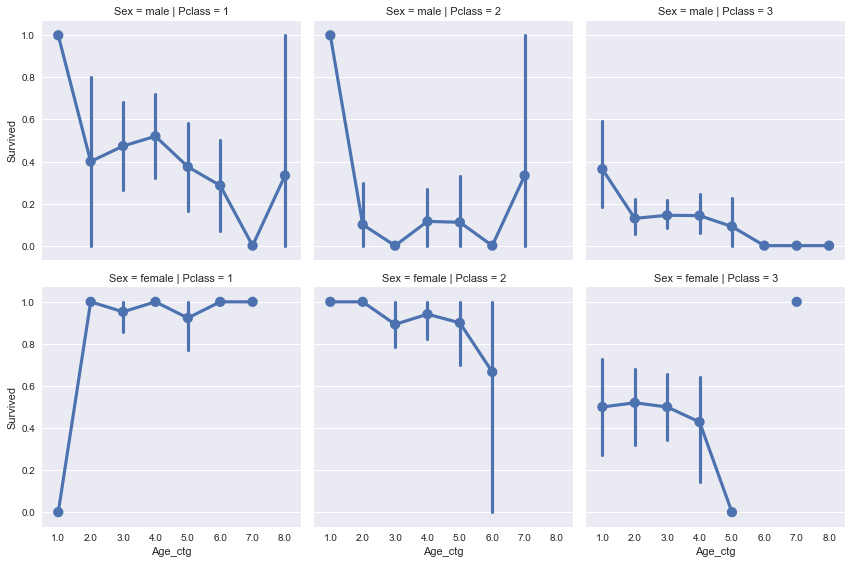

In [139]:
sns.factorplot('Age_ctg','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [140]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_ctg, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For passengers in Age_ctg = 1 (younger than 10) : All male in Pclass 1 and 2 survived

All female in Pclass 3 and Age_ctg = 5 died. 

(Survival rate for female in Pclass 3 and Age_ctg = 4 is below 50%)

(Survival rate for male in Pclass 1 and Age_ctg = 4 is above 50%)



In [141]:
# in Pclass 1 and 2 all men in Age_ctg = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_ctg == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_ctg == 1), 'Survived'] = 1

# all women in Pclass 3 and Age_ctg = 5 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Age_ctg == 5) , 'Survived'] = 0

# Survival rate for female in Pclass 3 and Age_ctg = 4 is below 50%
# df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Age_ctg == 4) , 'Survived'] = 0

# Survival rate for male in Pclass 1 and Age_ctg = 4 is above 50%
#df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_ctg == 4) , 'Survived'] = 1

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


**SibSp and Parch**

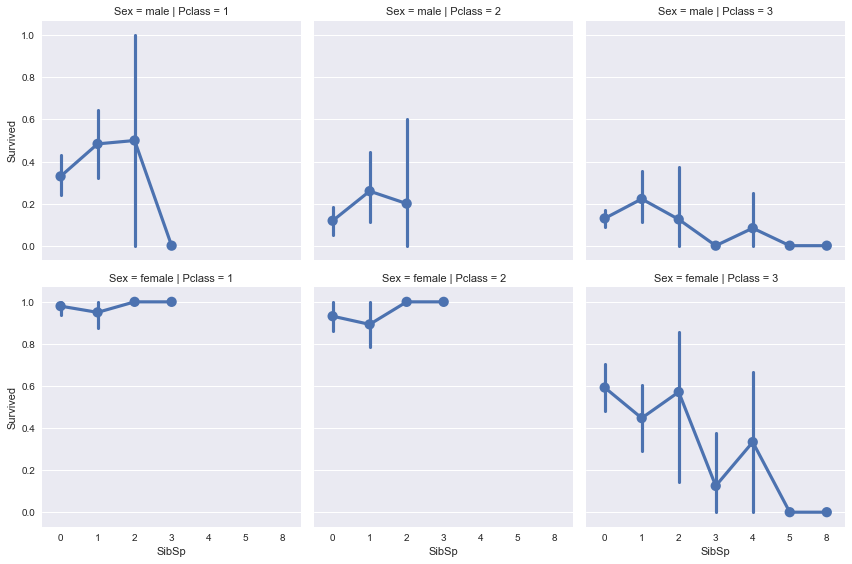

In [142]:
sns.factorplot('SibSp','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [143]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, no survival rate above 0.5 for any values of SibSp.
For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died.
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

In [144]:
# females with SibSp = 3 and Pclass = 3 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.SibSp == 3), 'Survived'] = 0

# all females with SibSp > 3 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 4) , 'Survived'] = 0

# For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.SibSp == 1) , 'Survived'] = 0

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


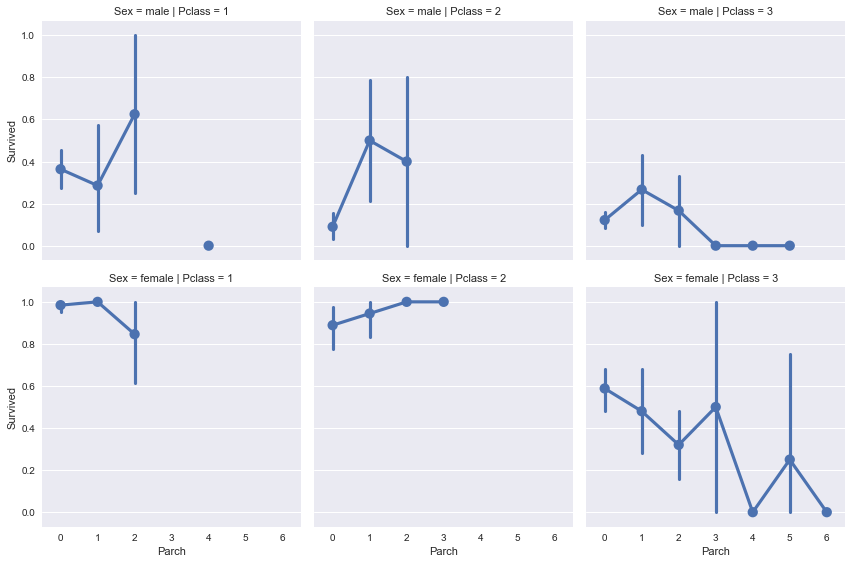

In [145]:
sns.factorplot('Parch','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [146]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Very similar to SibSp - 1 , but different values  ?
For females with Parch = 2 and Pclass = 3 survival rate is below 0.5  
All females with Parch = 4 and Pclass = 3 died.
All females with Parch > 4 died.
(For females with Parch = 1 and Pclass = 3 survival rate is below 0.5)
For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

In [147]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
#df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


**Fare categorical**

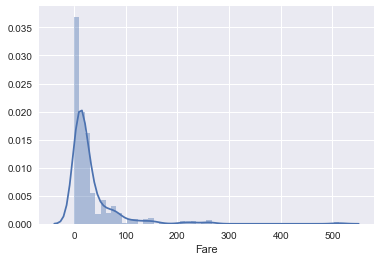

In [148]:
sns.distplot(df_train['Fare'])
plt.show()

In [149]:
for df in [df_train, df_test]:
    df['Fare_ctg']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_ctg'] = i

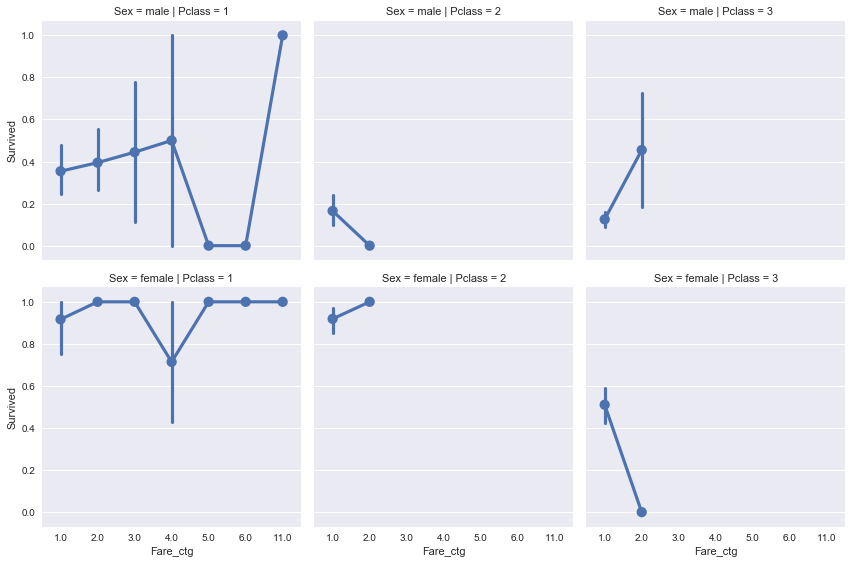

In [150]:
sns.factorplot('Fare_ctg','Survived', col='Pclass' , row = 'Sex', data=df_train)
plt.show()

In [151]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_ctg, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [152]:
# males in Fare_ctg = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_ctg == 11), 'Survived'] = 1

# females in Pclass = 3 and Fare_ctg = 2 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Fare_ctg == 2), 'Survived'] = 0

fourth model : model 3 + Age_ctg, SibSp, Parch and Fare_ctg

In [153]:
df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

In [154]:
df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_ctg,Fare_ctg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0,1.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0,1.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0,1.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0,1.0


Part 2

**Data wrangling and feature engineering**

building two new dataframes df_train_ml and df_test:ml

these will have only ordinal features and no missing values so they can be used for ML algorithms 

In [155]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

In [156]:
sex = pd.get_dummies(df_train_ml['Sex'],drop_first=True)
embark = pd.get_dummies(df_train_ml['Embarked'],drop_first=True)
df_train_ml.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'Age_ctg'],axis=1,inplace=True)
df_train_ml = pd.concat([df_train_ml,sex,embark],axis=1)
df_train_ml.dropna(inplace=True)

In [157]:
sex = pd.get_dummies(df_test_ml['Sex'],drop_first=True)
embark = pd.get_dummies(df_test_ml['Embarked'],drop_first=True)
df_test_ml.drop(['Sex','Embarked','Name','Ticket', 'Cabin', 'Age_ctg'],axis=1,inplace=True)
df_test_ml = pd.concat([df_test_ml,sex,embark],axis=1)
#df_test_ml.dropna(inplace=True)

In [158]:
df_train_ml.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_ctg,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,1,0,1
1,2,1,1,38.0,1,0,71.2833,2.0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1.0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2.0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1.0,1,0,1


In [159]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Fare_ctg       714 non-null float64
male           714 non-null uint8
Q              714 non-null uint8
S              714 non-null uint8
dtypes: float64(3), int64(5), uint8(3)
memory usage: 52.3 KB


In [160]:
df_test_ml.drop(['Survived'],axis=1,inplace=True)
df_test_ml.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fare_ctg,male,Q,S
0,892,3,34.5,0,0,7.8292,1.0,1,1,0
1,893,3,47.0,1,0,7.0000,1.0,0,0,1
2,894,2,62.0,0,0,9.6875,1.0,1,1,0
3,895,3,27.0,0,0,8.6625,1.0,1,0,1
4,896,3,22.0,1,1,12.2875,1.0,0,0,1


In [161]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Fare_ctg       417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(3), int64(4), uint8(3)
memory usage: 24.2 KB
